In [1]:
import pandas as pd
import math
import re
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

Automatically created module for IPython interactive environment


In [2]:
df2014 = pd.read_csv('data_2014-1.csv')
dfs2014 = df2014.sort_values(by=['starttime'])

In [3]:
'max:{}, min:{}'.format(df2014.startdate.max(),df2014.startdate.min())

'max:2014-12-31, min:2014-01-01'

In [4]:
df1To12 = df2014[ (df2014.month >= 1) & (df2014.month < 12) ]
cols = ['temperature','tripduration']

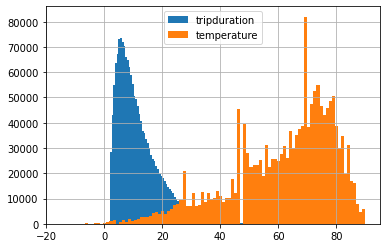

In [5]:
df2014['tripduration'].hist(bins=100, label='tripduration')
df2014['temperature'].hist(bins=100, label='temperature')
plt.legend()

In [6]:
dfs2014.temperature.max(),df2014.temperature.min()

(90.0, -15.0)

In [7]:
### Sampling Data, 100 rows
col = ['temperature','tripduration','starttime']
dfs = df2014[col]

(<AxesSubplot:>, <AxesSubplot:>)

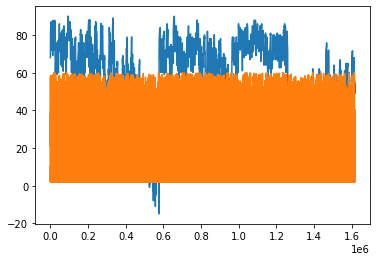

In [8]:
### Raw Sequence plots: (temperature, tripduration)

col = ['temperature','tripduration']
arr = dfs[col].to_numpy()
dfs['temperature'].plot(), dfs['tripduration'].plot()

## Scaling the temperature, and trip duration

In [9]:
col = ['temperature','tripduration']
mxs = MinMaxScaler()
dfs[col] = mxs.fit_transform(dfs[col])
dfs['starttime'] = dfs2014.starttime

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [10]:
dfs = dfs.sort_values(by='starttime')

In [11]:
dfs.head()

temperature  tripduration            starttime
576426     0.246667      0.064943  2014-01-01 01:12:00
576425     0.246667      0.152299  2014-01-01 01:43:00
576424     0.246667      0.152874  2014-01-01 01:43:00
576423     0.246667      0.228736  2014-01-01 01:44:00
576422     0.246667      0.225287  2014-01-01 01:45:00

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, Conv1D, Dropout, Input
import tensorflow as tf

## Model with real data

In [13]:
def model(n):
    
    larr = []

    m = Sequential()

    L = Conv1D(100, 2, use_bias=True)
    larr.append(L)

    L = LSTM(50, return_sequences=True)
    larr.append(L)

    L = LSTM(50, return_sequences=True)
    larr.append(L)
    
    L = Dropout(0.2)
    larr.append(L)
    
    
    L = Dense(10)
    larr.append(L)

    L = LSTM(50, return_sequences=True)
    larr.append(L)

    L = Dense(1)
    larr.append(L)

    L = LSTM(n)
    larr.append(L)
    
    for e in larr: m.add(e)
    
    return m

### Function to run the model

In [14]:
def runme(dfs):
    
    xi = dfs['temperature'].to_numpy()
    yi = dfs['tripduration'].to_numpy()
    xi = xi.reshape((10,10,1))

    m = model(10)
    m.compile(optimizer='adam',loss='mse')

    h = m.fit(xi, yi, validation_split=0.5, epochs=100, verbose=0)
    yp = m.predict(xi)
    
    return yp, h

### Plot the validation, and losses

In [15]:
def lossplot(h, dstr, show=False):
    
    import matplotlib.pyplot as plt
    import matplotlib
    
    fig = plt.figure()
    
    plt.plot(h.history['loss'], label='loss')
    plt.plot(h.history['val_loss'], label='val_loss')
    plt.legend(['train','test'],loc='upper left')

    plt.title('loss plot: {}'.format(dstr))

    figName = 'loss_' + dstr + '.jpg'
    plt.savefig(figName, dpi=300)
    
    plt.close(fig)
    

### Compare data, vs prediction

In [16]:
def output(yp,dfs,dstr):
    
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.use('Agg')
    plt.ioff()
    
    y = yp.flatten()
    N = len(y)
    x = np.arange(N)
    
    fig, ax = plt.subplots()
    ax.plot(x,y,label='output')
    ax.plot(x,dfs['tripduration'],label='input')
    plt.title('output: {}'.format(dstr))
    ax.legend()

    figName = 'output_' + dstr + '.jpg'
    plt.savefig(figName, dpi=300)
    plt.close(fig)
    

In [17]:
dfs.shape

(1615683, 3)

### Submit the tasks in bulk 

Adjust `cc` to iterator over a few test cases, if $cc > 0$, the loop runs over batches of 100 covering all the columns in 2014. Edge case needs to be accounted for 

In [18]:
fstr = lambda x : re.subn('\s','_',x)[0]

b = 0; P = 100
cc = 0
N = (df2014.shape[0]/100)
iN = math.floor(N/P)
for e in range(iN): 
    
    e = b+P
    dgs = dfs[b:e]
    
    dmin = fstr(dgs.starttime.min())
    dmax = fstr(dgs.starttime.max())
    
    label = '{}__To__{}'.format(dmin, dmax)
    #print(cc, dgs.starttime.min(), dgs.starttime.max())
    
    yp, h = runme(dgs)
    lossplot(h, label)
    output(yp, dgs, label)
    
    b = e
    if cc == 16 : break
    cc += 1

<br>